### Libraries for dataset manipulation and visulization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset Loading

In [3]:
dataset = pd.read_csv('C:\\Users\\Mahmood Yousaf\\Desktop\\FYP\\Final-Year-Project-Soil-Analysis-using-machine-learning\\Extracted Features\\Formula_Index_with_P_value.csv')

### Preprocessing on dataset

In [4]:
X = np.array(dataset['Formula_Index'])
Y = np.array(dataset['P_Value'])
print(X)
print(Y)

[525.  505.  542.  ... 397.  262.5 365. ]
[5.4 5.4 4.8 ... 5.  5.5 5.5]


In [5]:
X = X.reshape(len(X),1)
Y = Y.reshape(len(Y),1)
print(X,Y)

[[525. ]
 [505. ]
 [542. ]
 ...
 [397. ]
 [262.5]
 [365. ]] [[5.4]
 [5.4]
 [4.8]
 ...
 [5. ]
 [5.5]
 [5.5]]


### Standardization of input and output label

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)
print(X)
print(Y)

[[ 0.77892455]
 [ 0.52980169]
 [ 0.99067899]
 ...
 [-0.81546179]
 [-2.49081307]
 [-1.21405838]]
[[ 0.08677258]
 [ 0.08677258]
 [-0.39077583]
 ...
 [-0.23159302]
 [ 0.16636398]
 [ 0.16636398]]


### SVR model training

In [7]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,Y)

C:\Users\Mahmood Yousaf\.conda\envs\gpuEnv\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Prediction 

In [8]:
prediction = regressor.predict(X)

In [9]:
prediction = prediction.reshape(len(prediction),1)
print(sc_Y.inverse_transform(prediction))

[[5.2297899 ]
 [5.28502725]
 [5.22180423]
 ...
 [4.71180406]
 [4.76186556]
 [4.82292902]]


### Visulization

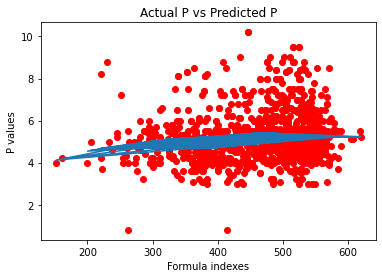

In [11]:
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color = 'red')
plt.plot(sc_X.inverse_transform(X),sc_Y.inverse_transform(prediction))
plt.title("Actual P vs Predicted P")
plt.xlabel('Formula indexes')
plt.ylabel('P values')
plt.savefig("SVRmodelForPestimationUsingFormula.jpg")